  Using cached afinn-0.1-py3-none-any.whl


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-255f627aabfb>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_Modi['AfinnScore'], palette=['#808080', '#00FF00', "#FF0000"])


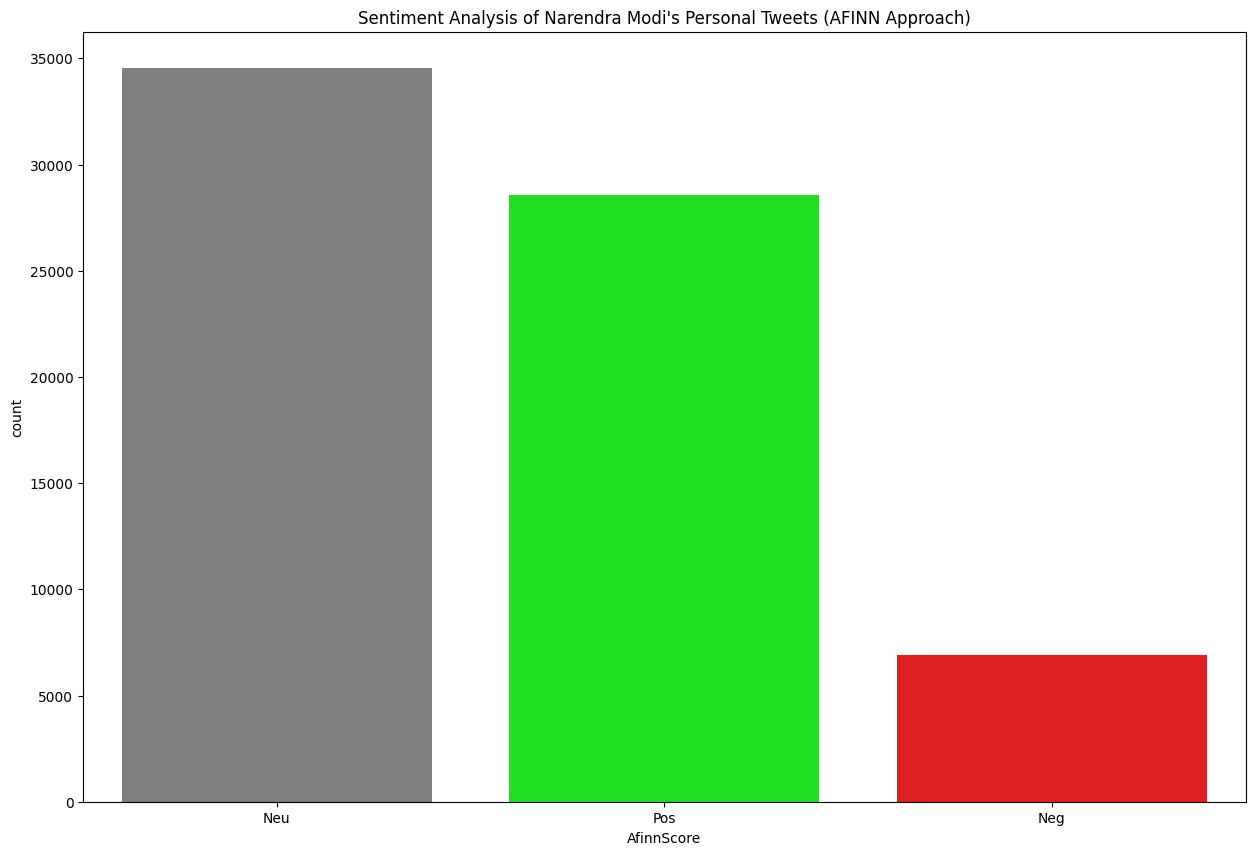

<ipython-input-1-255f627aabfb>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.countplot(x=df_Rahul['AfinnScore'], palette=['#808080', '#00FF00', "#FF0000"])


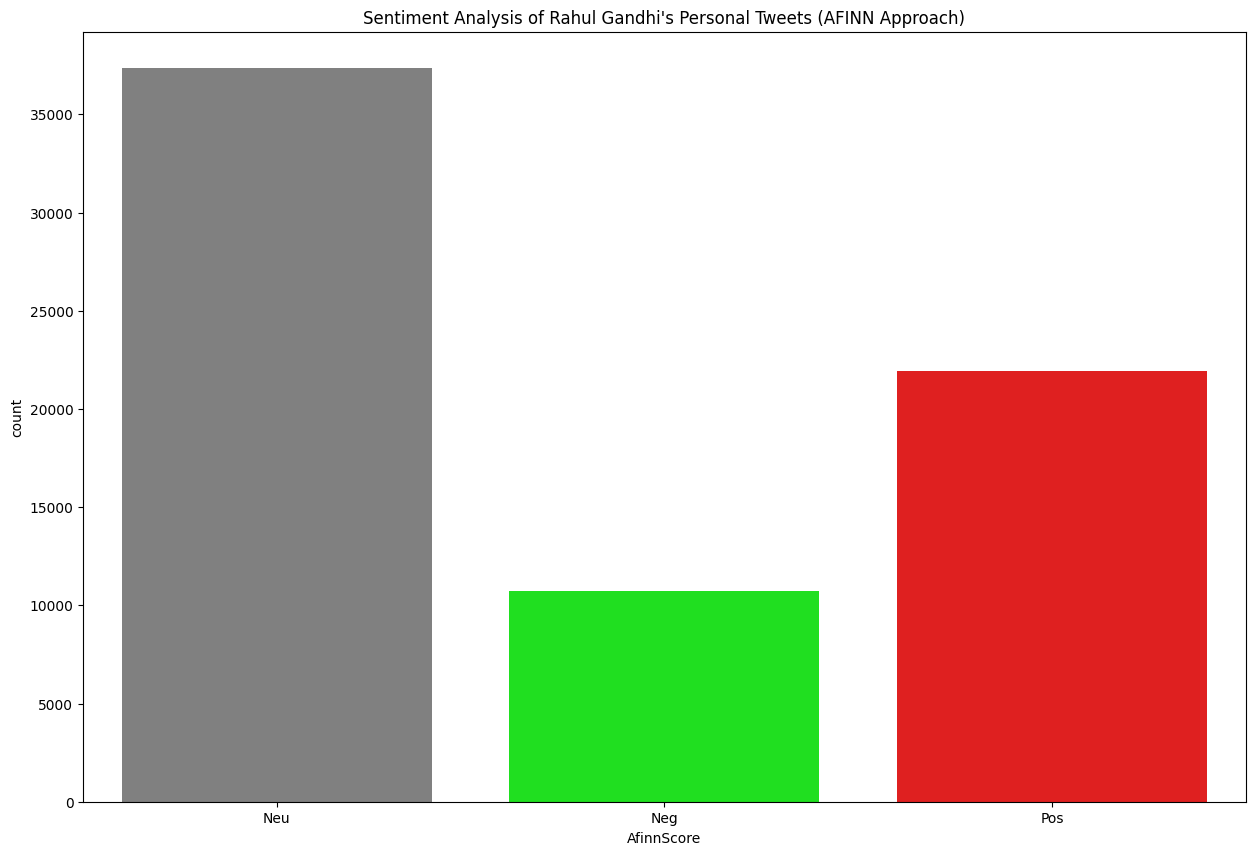

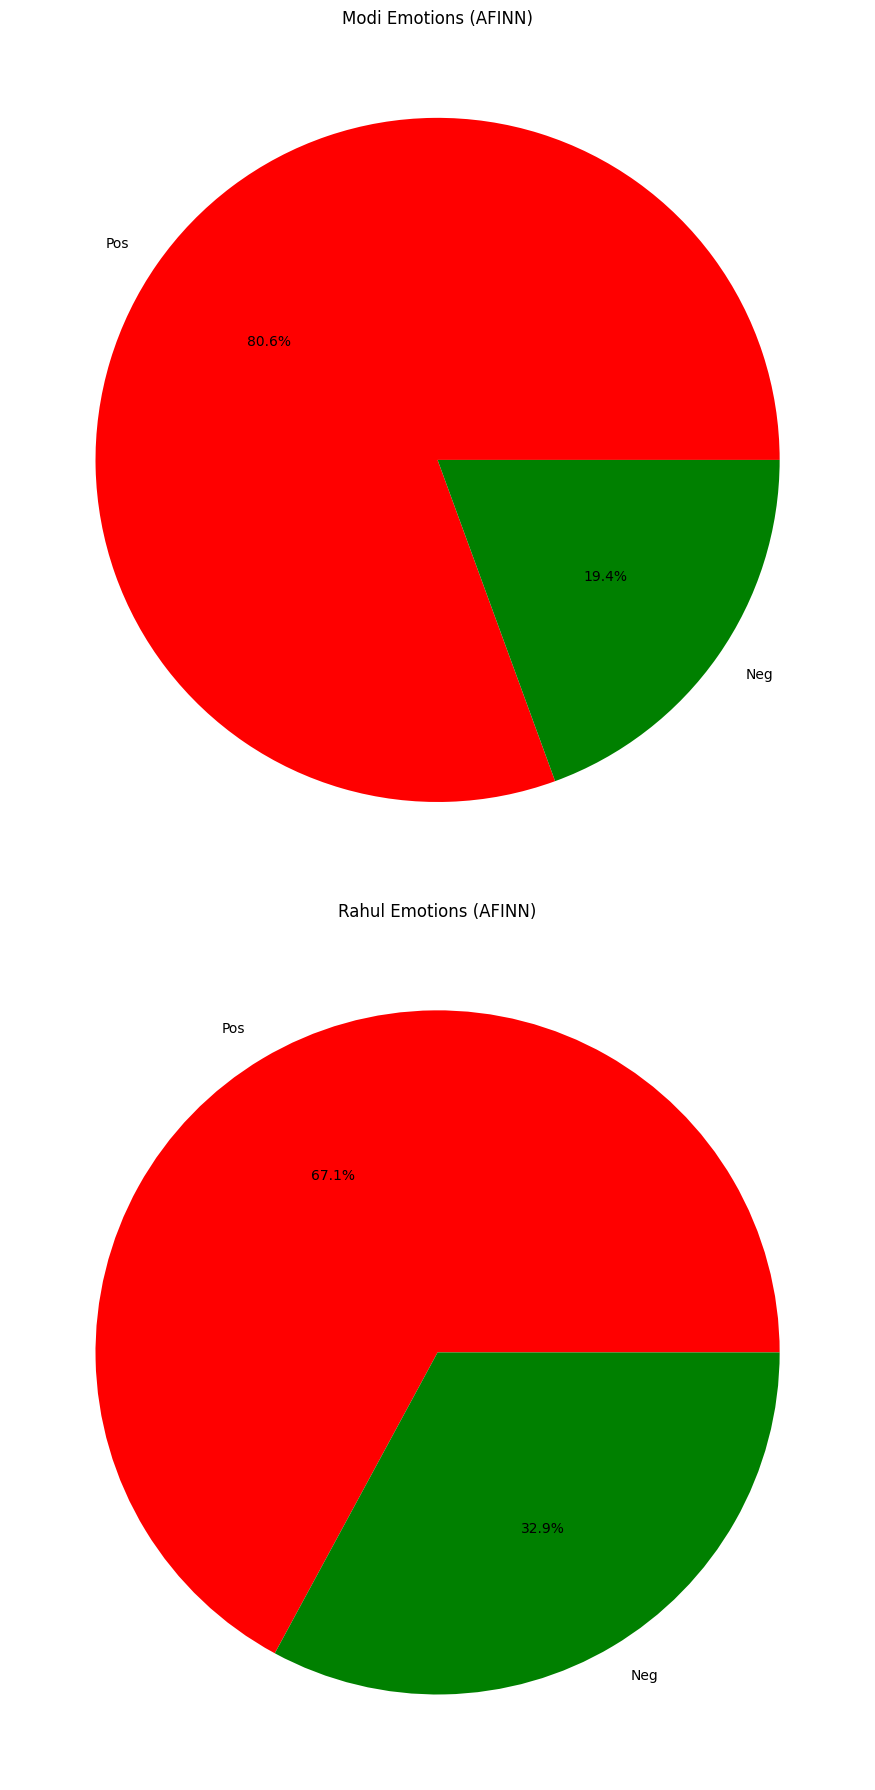

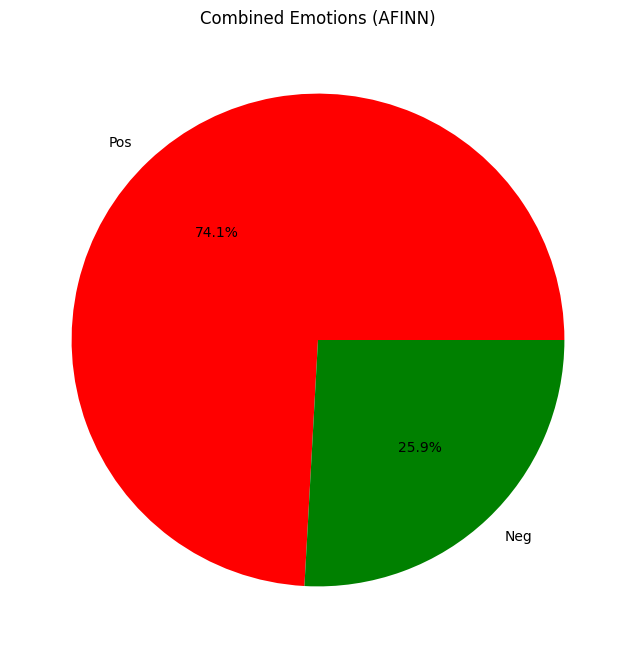

The predicted winning politician based on net sentiment score (AFINN) is: Narendra Modi


In [ ]:
!pip install afinn

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from afinn import Afinn
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Initialize AFINN sentiment analyzer
afinn = Afinn()

# Read the datasets from Google Drive
df_Modi = pd.read_csv('/content/Narendra Modi_data.csv', index_col=0)
df_Rahul = pd.read_csv('/content/Rahul Gandhi_data.csv', index_col=0)

# Remove English stopwords from tweets
stop_words = ENGLISH_STOP_WORDS
df_Modi['Tweet'] = df_Modi['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df_Rahul['Tweet'] = df_Rahul['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Perform sentiment analysis using AFINN
df_Modi['AfinnScore'] = df_Modi['Tweet'].apply(lambda x: 'Pos' if afinn.score(x) > 0 else ('Neg' if afinn.score(x) < 0 else 'Neu'))
df_Rahul['AfinnScore'] = df_Rahul['Tweet'].apply(lambda x: 'Pos' if afinn.score(x) > 0 else ('Neg' if afinn.score(x) < 0 else 'Neu'))

# Plot sentiment analysis results for Narendra Modi using AFINN
plt.figure(figsize=(15, 10))
ax = sns.countplot(x=df_Modi['AfinnScore'], palette=['#808080', '#00FF00', "#FF0000"])
ax.set_title("Sentiment Analysis of Narendra Modi's Personal Tweets (AFINN Approach)")
plt.show()

# Plot sentiment analysis results for Rahul Gandhi using AFINN
plt.figure(figsize=(15, 10))
bx = sns.countplot(x=df_Rahul['AfinnScore'], palette=['#808080', '#00FF00', "#FF0000"])
bx.set_title("Sentiment Analysis of Rahul Gandhi's Personal Tweets (AFINN Approach)")
plt.show()

# Filter out neutral sentiments
df_Modi_t = df_Modi[df_Modi['AfinnScore'] != 'Neu']
df_Rahul_t = df_Rahul[df_Rahul['AfinnScore'] != 'Neu']

# Define the emotions and their counts for each DataFrame
emotions_modi = df_Modi_t['AfinnScore'].value_counts()
emotions_rahul = df_Rahul_t['AfinnScore'].value_counts()

# Plot emotions for each politician using AFINN
fig, axs = plt.subplots(2, 1, figsize=(10, 18))

# Modi's emotions
axs[0].pie(emotions_modi, labels=emotions_modi.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
axs[0].set_title('Modi Emotions (AFINN)')

# Rahul's emotions
axs[1].pie(emotions_rahul, labels=emotions_rahul.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
axs[1].set_title('Rahul Emotions (AFINN)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Combine emotions for both politicians using AFINN
combined_emotions = pd.concat([emotions_modi, emotions_rahul], axis=1, keys=['Modi', 'Rahul']).fillna(0)
combined_emotions['Total'] = combined_emotions.sum(axis=1)

# Plot combined emotions using AFINN
plt.figure(figsize=(8, 8))
plt.pie(combined_emotions['Total'], labels=combined_emotions.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
plt.title('Combined Emotions (AFINN)')
plt.show()

# Calculate the net sentiment score for each politician using AFINN
net_sentiment_modi = (df_Modi_t['AfinnScore'] == 'Pos').sum() - (df_Modi_t['AfinnScore'] == 'Neg').sum()
net_sentiment_rahul = (df_Rahul_t['AfinnScore'] == 'Pos').sum() - (df_Rahul_t['AfinnScore'] == 'Neg').sum()

# Predict the election result using AFINN
if net_sentiment_modi > net_sentiment_rahul:
    winning_politician = 'Narendra Modi'
elif net_sentiment_modi < net_sentiment_rahul:
    winning_politician = 'Rahul Gandhi'
else:
    winning_politician = 'Tie'

print("The predicted winning politician based on net sentiment score (AFINN) is:", winning_politician)


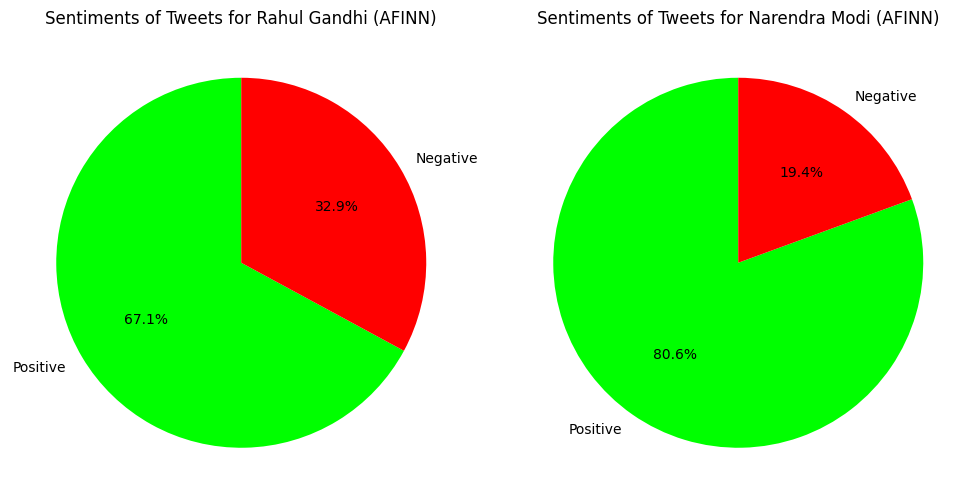

In [ ]:
# Calculate the proportions of positive and negative tweets for Rahul Gandhi and Narendra Modi using AFINN
rahul_positive_proportion_afinn = (df_Rahul['AfinnScore'] == 'Pos').mean()
rahul_negative_proportion_afinn = (df_Rahul['AfinnScore'] == 'Neg').mean()
modi_positive_proportion_afinn = (df_Modi['AfinnScore'] == 'Pos').mean()
modi_negative_proportion_afinn = (df_Modi['AfinnScore'] == 'Neg').mean()

# Create a pie chart for Rahul Gandhi's sentiments using AFINN
plt.figure(figsize=(10, 5))
labels = ['Positive', 'Negative']
sizes = [rahul_positive_proportion_afinn, rahul_negative_proportion_afinn]
colors = ['#00FF00', '#FF0000']
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiments of Tweets for Rahul Gandhi (AFINN)')

# Create a pie chart for Narendra Modi's sentiments using AFINN
plt.subplot(1, 2, 2)
sizes = [modi_positive_proportion_afinn, modi_negative_proportion_afinn]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiments of Tweets for Narendra Modi (AFINN)')

plt.tight_layout()
plt.show()


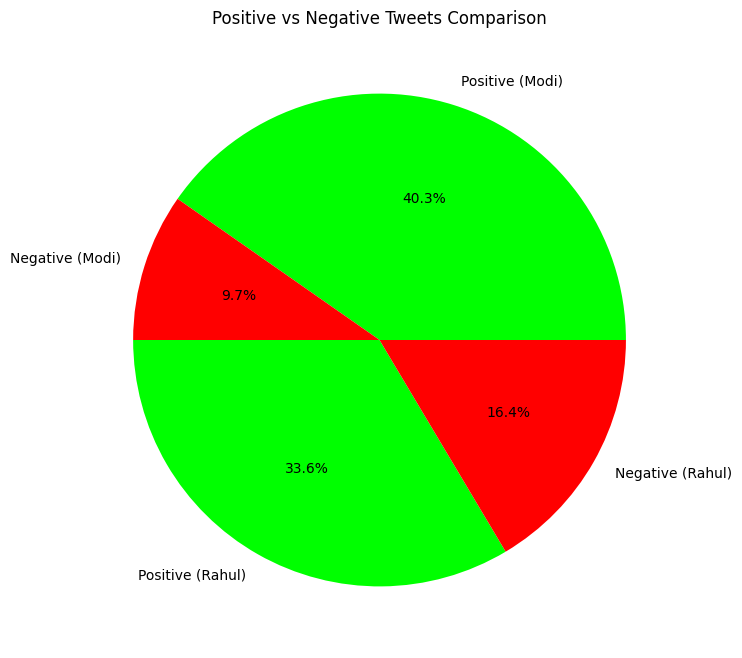

The predicted winning politician based on positive sentiment score (AFINN) is: Narendra Modi


In [ ]:
# Calculate the percentage of positive and negative tweets for each politician
total_tweets_modi = len(df_Modi_t)
total_tweets_rahul = len(df_Rahul_t)

positive_tweets_modi = (df_Modi_t['AfinnScore'] == 'Pos').sum()
negative_tweets_modi = (df_Modi_t['AfinnScore'] == 'Neg').sum()

positive_tweets_rahul = (df_Rahul_t['AfinnScore'] == 'Pos').sum()
negative_tweets_rahul = (df_Rahul_t['AfinnScore'] == 'Neg').sum()

# Calculate percentages
positive_percentage_modi = (positive_tweets_modi / total_tweets_modi) * 100
negative_percentage_modi = (negative_tweets_modi / total_tweets_modi) * 100

positive_percentage_rahul = (positive_tweets_rahul / total_tweets_rahul) * 100
negative_percentage_rahul = (negative_tweets_rahul / total_tweets_rahul) * 100

# Plotting the pie chart for positive and negative tweets of both politicians
labels = ['Positive (Modi)', 'Negative (Modi)', 'Positive (Rahul)', 'Negative (Rahul)']
sizes = [positive_percentage_modi, negative_percentage_modi, positive_percentage_rahul, negative_percentage_rahul]
colors = ['#00FF00', '#FF0000', '#00FF00', '#FF0000']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Positive vs Negative Tweets Comparison')
plt.show()

# Predict the winner for the election based on sentiment analysis using AFINN
if positive_percentage_modi > positive_percentage_rahul:
    winning_politician_afinn = 'Narendra Modi'
elif positive_percentage_modi < positive_percentage_rahul:
    winning_politician_afinn = 'Rahul Gandhi'
else:
    winning_politician_afinn = 'Tie'

print("The predicted winning politician based on positive sentiment score (AFINN) is:", winning_politician_afinn)
